# Visualisation des données

In [4]:
import os
import yaml
import pandas as pd

In [5]:
# Répertoire du fichier de données
PROCESSED_DIR = '../data/processed/'

# Table principale
ALL_DATA_FILE = 'all_data.csv'

In [6]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [7]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Hubei,Mainland China,2020-02-26 14:13:10,65187.0,2615.0,20969.0,30.9756,112.2707,02-26-2020.csv,2020-02-26
1,Guangdong,Mainland China,2020-02-26 10:33:02,1347.0,7.0,851.0,23.3417,113.4244,02-26-2020.csv,2020-02-26
2,Henan,Mainland China,2020-02-26 10:33:02,1271.0,19.0,1033.0,33.8820,113.6140,02-26-2020.csv,2020-02-26
3,NaN,South Korea,2020-02-26 11:03:11,1261.0,12.0,22.0,36.0000,128.0000,02-26-2020.csv,2020-02-26
4,Zhejiang,Mainland China,2020-02-26 10:33:02,1205.0,1.0,867.0,29.1832,120.0934,02-26-2020.csv,2020-02-26


In [8]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [9]:
epidemie_df['Country/Region'].value_counts()

Mainland China        1517
US                    1055
Australia              233
Canada                 151
China                   66
                      ... 
Saint Martin             1
Ivory Coast              1
Hong Kong SAR            1
Channel Islands          1
Russian Federation       1
Name: Country/Region, Length: 145, dtype: int64

In [12]:
(epidemie_df[epidemie_df['Country/Region']=='France']
                    .groupby(['Country/Region','day'])
                    .agg({'Confirmed':'sum'})
                    .reset_index()
                   )

,Country/Region,day,Confirmed
0,France,2020-01-24,2.0
1,France,2020-01-25,3.0
2,France,2020-01-26,3.0
3,France,2020-01-27,3.0
4,France,2020-01-28,4.0
5,France,2020-01-29,5.0
6,France,2020-01-30,5.0
7,France,2020-01-31,5.0
8,France,2020-02-01,42.0
9,France,2020-02-08,44.0


## Epidémie en France

In [7]:
import seaborn as sns

sns.set()

In [8]:
%matplotlib inline

In [9]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
43,NaN,France,2020-02-26 20:03:06,18.0,2.0,11.0,47.0,2.0,02-26-2020.csv,2020-02-26
141,NaN,France,2020-02-27 22:13:10,38.0,2.0,11.0,47.0,2.0,02-27-2020.csv,2020-02-27
246,NaN,France,2020-02-15 20:53:02,12.0,1.0,4.0,47.0,2.0,02-18-2020.csv,2020-02-15
321,NaN,France,2020-02-15 20:53:02,12.0,1.0,4.0,47.0,2.0,02-19-2020.csv,2020-02-15
361,NaN,France,2020-03-10 18:53:02,1784.0,33.0,12.0,47.0,2.0,03-10-2020.csv,2020-03-10


In [14]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
             .drop_duplicates(subset=['Province/State','day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed':'sum', 'Deaths':'sum','Recovered':'sum'})
             .reset_index()
            )
             
france_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,France,2020-01-24,2.0,0.0,0.0
1,France,2020-01-25,3.0,0.0,0.0
2,France,2020-01-26,3.0,0.0,0.0
3,France,2020-01-27,3.0,0.0,0.0
4,France,2020-01-28,4.0,0.0,0.0


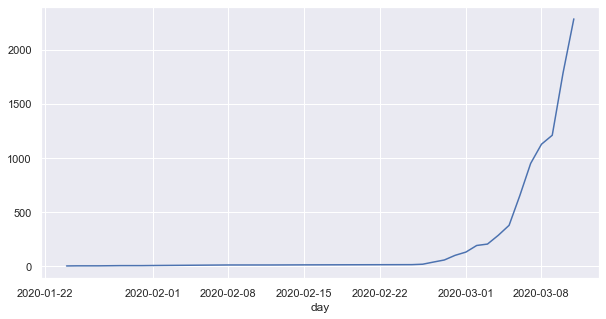

In [16]:
france_df[france_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

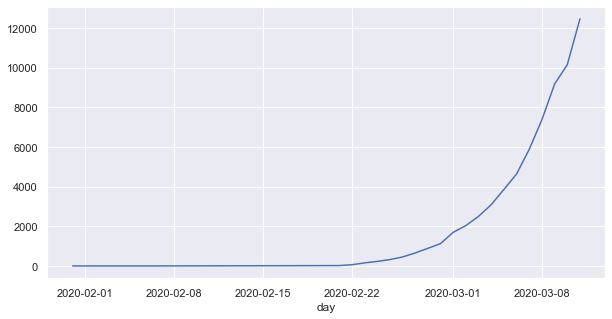

In [18]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

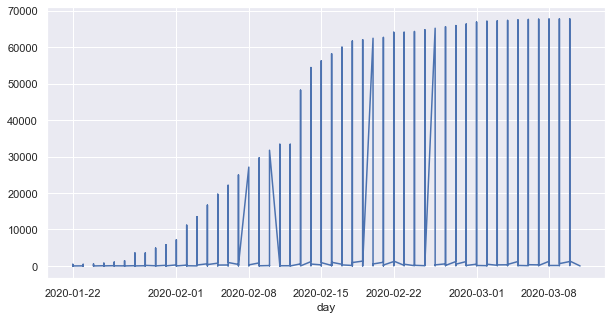

In [19]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

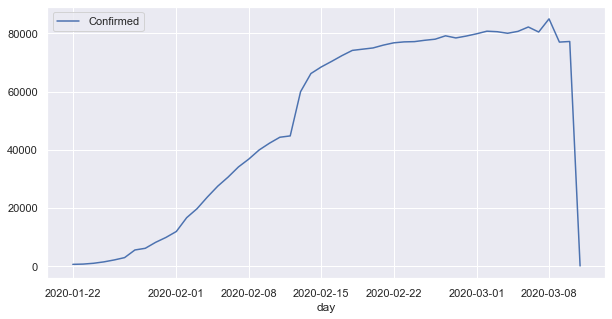

In [20]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .groupby('day')
 .agg({'Confirmed': 'sum'})
).plot(figsize=(10, 5));

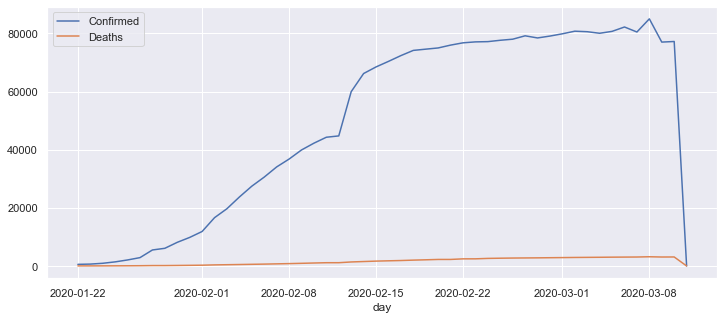

In [21]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
).plot(figsize=(12, 5));

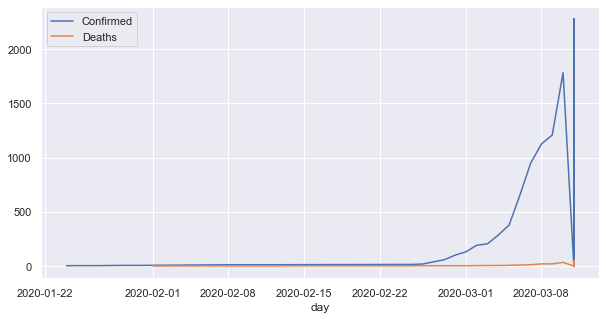

In [22]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')[ ['Confirmed', 'Deaths'] ].plot(figsize=(10, 5));

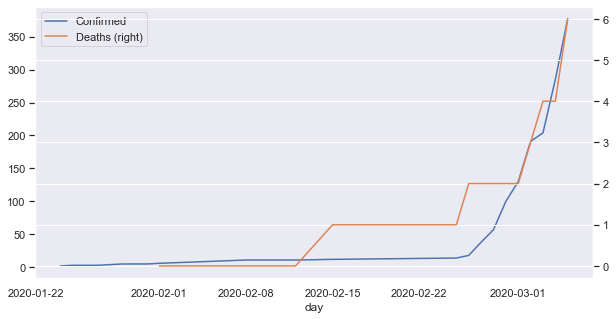

In [66]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Deaths'] ]
 .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

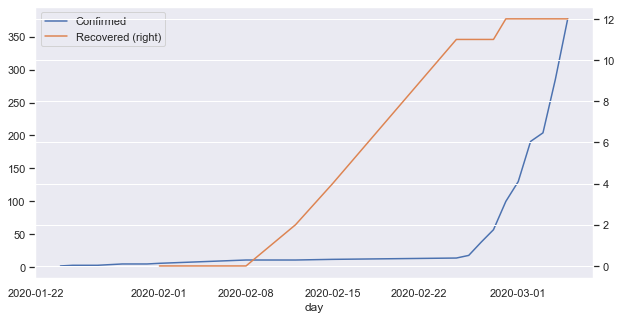

In [67]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
 .set_index('day')[ ['Confirmed', 'Recovered'] ]
 .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [68]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           )

In [70]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


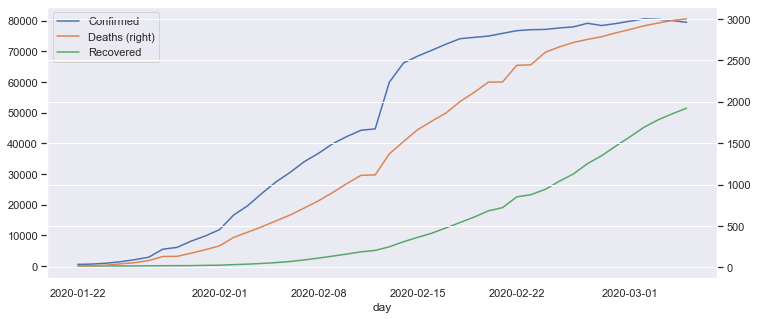

In [72]:
china_df.plot(secondary_y=['Deaths'], figsize=(12, 5));

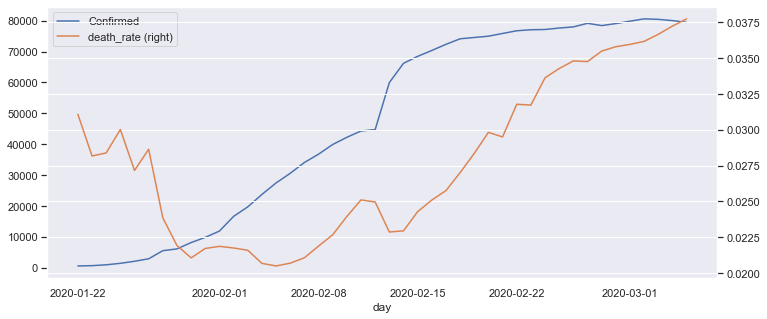

In [73]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12, 5))
);

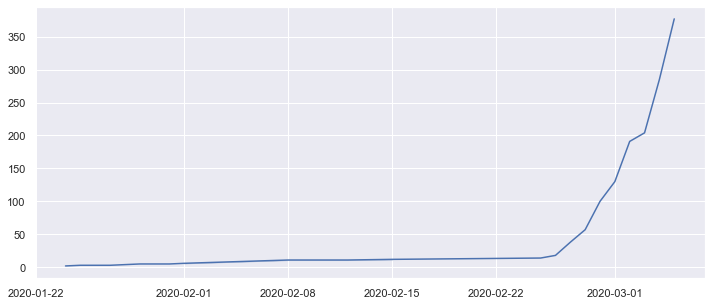

In [78]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed']);

In [79]:
epidemie_df.groupby(['Country/Region', 'day']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

Confirmed  Deaths  Recovered
Country/Region day                                     
 Azerbaijan    2020-02-28        1.0     0.0        0.0
Afghanistan    2020-02-24       11.0     0.0        0.0
Algeria        2020-02-25        6.0     0.0        0.0
               2020-03-02        3.0     0.0        0.0
               2020-03-03        5.0     0.0        0.0
...                              ...     ...        ...
Vietnam        2020-02-10       14.0     0.0        1.0
               2020-02-11       30.0     0.0       12.0
               2020-02-13      128.0     0.0       56.0
               2020-02-21       64.0     0.0       56.0
               2020-02-25      160.0     0.0      160.0

[819 rows x 3 columns]

In [5]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

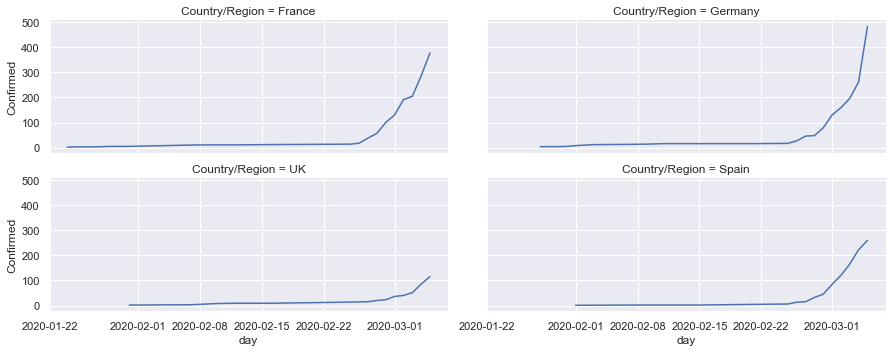

In [16]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                  col="Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, "day", "Confirmed");

In [17]:
import plotly.offline as py
import plotly.graph_objs as go

In [18]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [20]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Cas confirmés en France'
                  )]
py.iplot(data)

In [23]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)